# Simple Exponential Smoothing with Statsmodels

#### https://www.statsmodels.org/stable/tsa.html#module-statsmodels.tsa

#### Two side notes:
- I find that the results I get with statsmodels are almost equal to SPSS but there are slight differences
- The statsmodels documentation is unfortunately not so clear

In [1]:
# getting some warnings from matplotlib, so turning those warnings off
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# statsmodels documentation on simple exponential smoothing:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
# reading csv to dataframe
filename = './data/chemical.csv'
df = pd.read_csv(filename)

In [4]:
# inspecting data
df.head(3)

,temperature
0,153.000
1,145.000
2,142.000


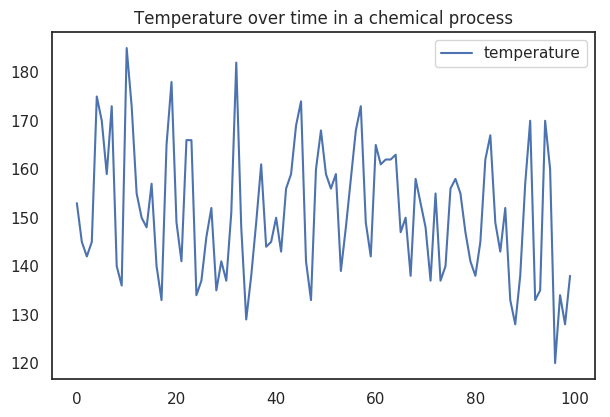

In [5]:
# quick plot of the data
df.plot(title='Temperature over time in a chemical process');

In [6]:
# fitting a simple exponential smoothing model
# the fit returns results with attributes. You can find what the results are via this link:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.HoltWintersResults.html
simple_exp_smoothing_model = SimpleExpSmoothing(df['temperature']).fit()

In [7]:
# parameters used for model. You can see that alpha=0.0557
# since alpha is small, relatively little weight is put on recent values
simple_exp_smoothing_model.params

{'smoothing_level': 0.05569407849700134,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 153.79517123880555,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [8]:
# get fitted values
df['fitted'] = simple_exp_smoothing_model.fittedvalues

In [9]:
# get predicted values: they are all the same, since there is no trend assumed
predictions = simple_exp_smoothing_model.predict(start=100, end=104)
predictions

100   146.044
101   146.044
102   146.044
103   146.044
104   146.044
dtype: float64

In [10]:
# add predictions to dataframe:
# including predictions
df = pd.concat([df, predictions], axis=1).rename(columns={0:'predicted'})
df.tail(7)

,temperature,fitted,predicted
98,128.000,147.610,nan
99,138.000,146.518,nan
100,nan,nan,146.044
101,nan,nan,146.044
102,nan,nan,146.044
103,nan,nan,146.044
104,nan,nan,146.044


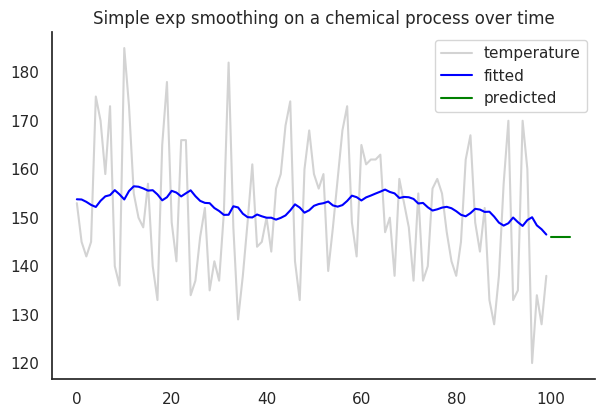

In [11]:
# plot results
df.plot(
    color=['lightgrey', 'blue', 'green'],
    title='Simple exp smoothing on a chemical process over time',
)
sns.despine();

In [12]:
# this is the Sum of Squared Errors (SSE) of the model
SSE = simple_exp_smoothing_model.sse
SSE

18216.84182075457

In [13]:
# calculate the Root Mean Squared Errors (RMSE) based on the SSE
degrees_freedom = df['temperature'].notna().sum() - 1
RMSE = np.sqrt(SSE / degrees_freedom)
RMSE

13.564973396212215